Dengue fever is bad. It's real bad. Dengue is a mosquito-borne disease that occurs in tropical and sub-tropical parts of the world. In mild cases, symptoms are similar to the flu: fever, rash and muscle and joint pain. But severe cases are dangerous, and dengue fever can cause severe bleeding, low blood pressure and even death.

Because it is carried by mosquitoes, the transmission dynamics of dengue are related to climate variables such as temperature and precipitation. Although the relationship to climate is complex, a growing number of scientists argue that climate change is likely to produce distributional shifts that will have significant public health implications worldwide.

We've [launched a competition](https://www.drivendata.org/competitions/44/) to use open data to predict the occurrence of Dengue based on climatological data. Here's a first look at the data and how to get started!

As always, we begin with the sacred `import`'s of data science:

In [329]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# just for the sake of this blog post!
from warnings import filterwarnings
filterwarnings('ignore')

## A Tale of Two Cities

![](https://community.drivendata.org/uploads/default/original/1X/4c3a8204d1715b5e2ee24da78abbad1515eccd5f.png)

This dataset has two cities in it: San Juan, Puerto Rico (right) and Iquitos, Peru (left). Since we hypothesize that the spread of dengue may follow different patterns between the two, we will divide the dataset, train seperate models for each city, and then join our predictions before making our final submission.

In [330]:
# load the provided data
train_features = pd.read_csv('dengue_features_train.csv',
                             index_col=[0,1,2])

train_labels = pd.read_csv('dengue_labels_train.csv',
                           index_col=[0,1,2])

In [331]:
# Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']

In [332]:
print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

San Juan
features:  (936, 21)
labels  :  (936, 1)

Iquitos
features:  (520, 21)
labels  :  (520, 1)


In [333]:
#swap the cities
sj_train_features = iq_train_features
sj_train_labels = iq_train_labels

In [334]:
print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

San Juan
features:  (520, 21)
labels  :  (520, 1)

Iquitos
features:  (520, 21)
labels  :  (520, 1)


In [335]:
sj_train_features.head(10)
#sj_train_labels.min()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                           
2000 26              2000-07-01  0.192886  0.132257  0.340886  0.247200   
     27              2000-07-08  0.216833  0.276100  0.289457  0.241657   
     28              2000-07-15  0.176757  0.173129  0.204114  0.128014   
     29              2000-07-22  0.227729  0.145429  0.254200  0.200314   
     30              2000-07-29  0.328643  0.322129  0.254371  0.361043   
     31              2000-08-05  0.205529  0.190757  0.231671  0.255314   
     32              2000-08-12  0.312486  0.329986  0.380586  0.387271   
     33              2000-08-19  0.384133  0.392240  0.341780  0.382750   
     34              2000-08-26  0.408157  0.322157  0.406714  0.302714   
     35              2000-09-02  0.332043  0.321057  0.314614  0.324257   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
2000 26                         25.41             296.740000   
     27                         60.61             296.634286   
     28                         55.52             296.415714   
     29                          5.60             295.357143   
     30                         62.76             296.432857   
     31                         16.24             297.191429   
     32                         89.37             297.320000   
     33                         42.08             297.627143   
     34                         49.22             298.238571   
     35                         53.65             299.218571   

                 reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
year weekofyear                                                       
2000 26                     298.450000                   295.184286   
     27                     298.428571                   295.358571   
     28                     297.392857                   295.622857   
     29                     296.228571                   292.797143   
     30                     297.635714                   293.957143   
     31                     298.285714                   291.725714   
     32                     298.978571                   293.821429   
     33                     299.335714                   293.992857   
     34                     299.571429                   292.904286   
     35                     300.928571                   293.472857   

                 reanalysis_max_air_temp_k  ...  \
year weekofyear                             ...   
2000 26                              307.3  ...   
     27                              306.6  ...   
     28                              304.5  ...   
     29                              303.6  ...   
     30                              307.0  ...   
     31                              306.2  ...   
     32                              308.8  ...   
     33                              307.9  ...   
     34                              310.1  ...   
     35                              310.5  ...   

                 reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                    
2000 26                                    43.19   
     27                                    46.00   
     28                                    64.77   
     29                                    23.96   
     30                                    31.80   
     31                                     1.00   
     32                                    26.68   
     33                                    16.90   
     34                                     5.59   
     35                                    16.07   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
2000 26                                     92.418571   
     27                                     93.581429   
     28                    

In [68]:
# Remove `week_start_date` string.
#sj_train_features.drop('week_start_date', axis=1, inplace=True)
#iq_train_features.drop('week_start_date', axis=1, inplace=True)

#sj_train_features.head(10)

In [336]:
sj_train_features.dtypes

week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c                       float64
station_min_temp_c                       float64
station_precip_mm   

In [337]:
#remove week_start_date and add month column

#convert object to datetime format
sj_train_features['week_start_date'] =  pd.to_datetime(sj_train_features['week_start_date'])
#add month feature
sj_train_features.loc[:, 'month'] = sj_train_features.loc[:, 'week_start_date'].dt.month
#add week feature
sj_train_features.loc[:, 'week'] = sj_train_features.loc[:, 'week_start_date'].dt.week
#remove week_start_date feature
sj_train_features.drop('week_start_date', axis=1, inplace=True)
sj_train_features.dtypes


ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c                       float64
station_min_temp_c                       float64
station_precip_mm                        float64
month               

In [338]:
sj_train_features.head(10)

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
year weekofyear                                                                 
2000 26          0.192886  0.132257  0.340886  0.247200                 25.41   
     27          0.216833  0.276100  0.289457  0.241657                 60.61   
     28          0.176757  0.173129  0.204114  0.128014                 55.52   
     29          0.227729  0.145429  0.254200  0.200314                  5.60   
     30          0.328643  0.322129  0.254371  0.361043                 62.76   
     31          0.205529  0.190757  0.231671  0.255314                 16.24   
     32          0.312486  0.329986  0.380586  0.387271                 89.37   
     33          0.384133  0.392240  0.341780  0.382750                 42.08   
     34          0.408157  0.322157  0.406714  0.302714                 49.22   
     35          0.332043  0.321057  0.314614  0.324257                 53.65   

                 reanalysis_air_temp_k  reanalysis_avg_temp_k  \
year weekofyear                                                 
2000 26                     296.740000             298.450000   
     27                     296.634286             298.428571   
     28                     296.415714             297.392857   
     29                     295.357143             296.228571   
     30                     296.432857             297.635714   
     31                     297.191429             298.285714   
     32                     297.320000             298.978571   
     33                     297.627143             299.335714   
     34                     298.238571             299.571429   
     35                     299.218571             300.928571   

                 reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
year weekofyear                                                           
2000 26                           295.184286                      307.3   
     27                           295.358571                      306.6   
     28                           295.622857                      304.5   
     29                           292.797143                      303.6   
     30                           293.957143                      307.0   
     31                           291.725714                      306.2   
     32                           293.821429                      308.8   
     33                           293.992857                      307.9   
     34                           292.904286                      310.1   
     35                           293.472857                      310.5   

                 reanalysis_min_air_temp_k  ...  reanalysis_sat_precip_amt_mm  \
year weekofyear                             ...                                 
2000 26                              293.1  ...                         25.41   
     27                              291.1  ...                         60.61   
     28                              292.6  ...                         55.52   
     29                              288.6  ...                          5.60   
     30                              291.5  ...                         62.76   
     31                              288.5  ...                         16.24   
     32                              292.1  ...                         89.37   
     33                              290.6  ...                         42.08   
     34                              291.3  ...                         49.22   
     35                              292.9  ...                         53.65   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
2000 26                                      16.651429           8.928571   
     27                                      16.862857          10.314286   
     28                                      17.120000           7.385714   
     

Next, let's check to see if we are missing any values in this dataset:

In [339]:
# Null check
pd.isnull(sj_train_features).any()
#sj_train_features['ndvi_ne'].isnull().sum()

ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_temp_c                        True
station_min_temp_c                        True
station_precip_mm                         True
month                                    False
week         

Text(0.5, 0, 'Time')

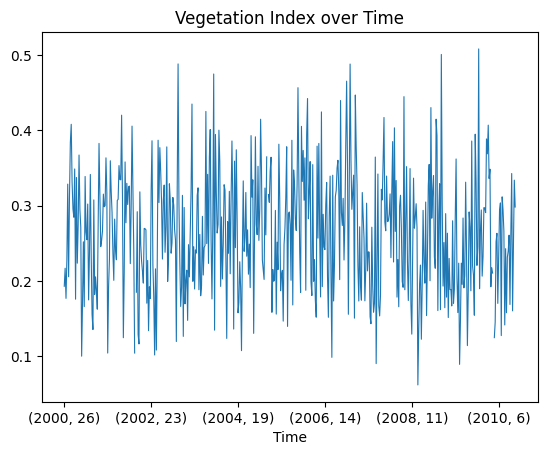

In [340]:
(sj_train_features
     .ndvi_ne
     .plot
     .line(lw=0.8))

plt.title('Vegetation Index over Time')
plt.xlabel('Time')

Since these are time-series, we can see the gaps where there are `NaN`s by plotting the data. Since we can't build a model without those values, we'll take a simple approach and just fill those values with the most recent value that we saw up to that point. This is probably a good part of the problem to improve your score by getting smarter.

In [341]:
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

pd.isnull(sj_train_features).any()


ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
month                                    False
week         

## Distribution of labels

Our target variable, `total_cases` is a non-negative integer, which means we're looking to make some **count predictions**. Standard regression techniques for this type of prediction include

1. Poisson regression
2. Negative binomial regression

Which techniqe will perform better depends on many things, but the choice between Poisson regression and negative binomial regression is pretty straightforward. Poisson regression fits according to the assumption that the mean and variance of the population distributiona are equal. When they aren't, specifically when the variance is much larger than the mean, the negative binomial approach is better. Why? It isn't magic. The negative binomial regression simply lifts the assumption that the population mean and variance are equal, allowing for a larger class of possible models. In fact, from this perspective, the Poisson distribution is but a special case of the negative binomial distribution.

Let's see how our labels are distributed!

In [342]:
#sj_train_features.head() 
#create new data
#dsj_train_features = sj_train_features[['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'station_avg_temp_c', 'station_min_temp_c']].copy()

dsj_train_features = sj_train_features
dsj_train_features


ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
year weekofyear                                                                 
2000 26          0.192886  0.132257  0.340886  0.247200                 25.41   
     27          0.216833  0.276100  0.289457  0.241657                 60.61   
     28          0.176757  0.173129  0.204114  0.128014                 55.52   
     29          0.227729  0.145429  0.254200  0.200314                  5.60   
     30          0.328643  0.322129  0.254371  0.361043                 62.76   
...                   ...       ...       ...       ...                   ...   
2010 21          0.342750  0.318900  0.256343  0.292514                 55.30   
     22          0.160157  0.160371  0.136043  0.225657                 86.47   
     23          0.247057  0.146057  0.250357  0.233714                 58.94   
     24          0.333914  0.245771  0.278886  0.325486                 59.67   
     25          0.298186  0.232971  0.274214  0.315757                 63.22   

                 reanalysis_air_temp_k  reanalysis_avg_temp_k  \
year weekofyear                                                 
2000 26                     296.740000             298.450000   
     27                     296.634286             298.428571   
     28                     296.415714             297.392857   
     29                     295.357143             296.228571   
     30                     296.432857             297.635714   
...                                ...                    ...   
2010 21                     299.334286             300.771429   
     22                     298.330000             299.392857   
     23                     296.598571             297.592857   
     24                     296.345714             297.521429   
     25                     298.097143             299.835714   

                 reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
year weekofyear                                                           
2000 26                           295.184286                      307.3   
     27                           295.358571                      306.6   
     28                           295.622857                      304.5   
     29                           292.797143                      303.6   
     30                           293.957143                      307.0   
...                                      ...                        ...   
2010 21                           296.825714                      309.7   
     22                           296.452857                      308.5   
     23                           295.501429                      305.5   
     24                           295.324286                      306.1   
     25                           295.807143                      307.8   

                 reanalysis_min_air_temp_k  ...  reanalysis_sat_precip_amt_mm  \
year weekofyear                             ...                                 
2000 26                              293.1  ...                         25.41   
     27                              291.1  ...                         60.61   
     28                              292.6  ...                         55.52   
     29                              288.6  ...                          5.60   
     30                              291.5  ...                         62.76   
...                                    ...  ...                           ...   
2010 21                              294.5  ...                         55.30   
     22                              291.9  ...                         86.47   
     23                              292.4  ...                         58.94   
     24                              291.9  ...                         59.67   
     25                              292.3  ...                         63.22   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekof

It's looking like a negative-binomial sort of day in these parts.

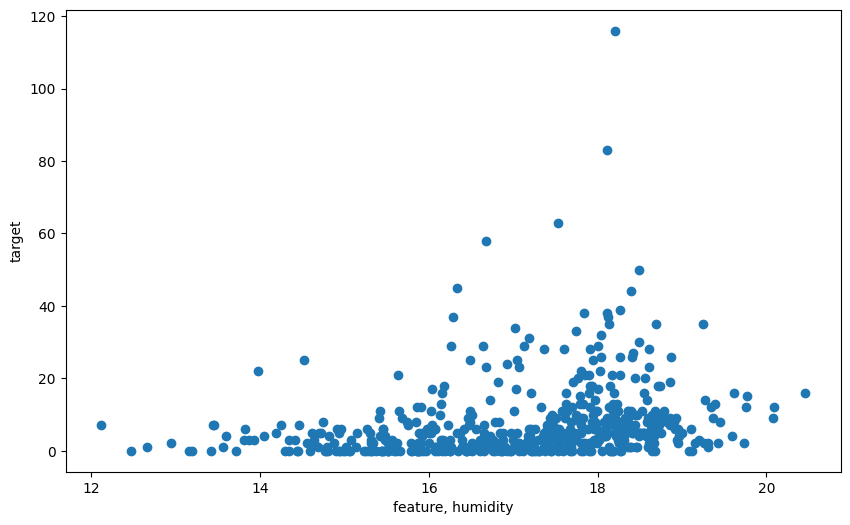

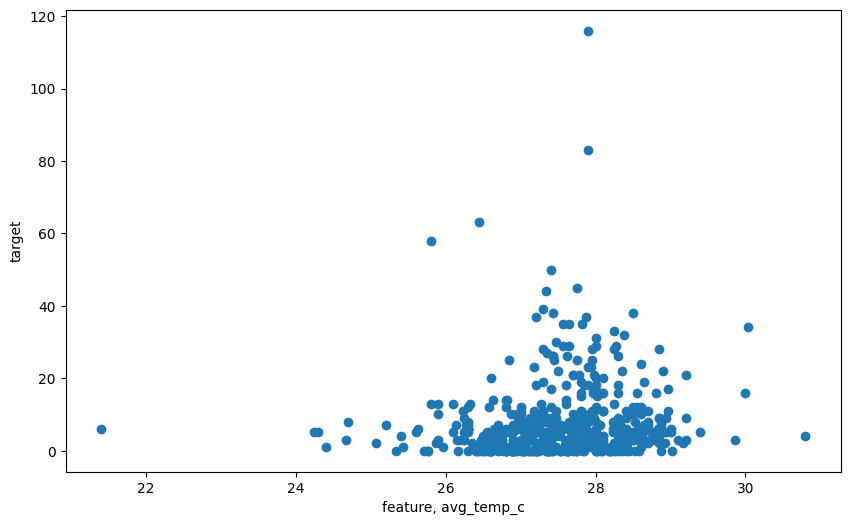

In [343]:
import matplotlib.pyplot as plt


fig1 = plt.figure(figsize=(10, 6))
plt.scatter(dsj_train_features['reanalysis_specific_humidity_g_per_kg'], sj_train_labels)
plt.xlabel('feature, humidity')
plt.ylabel('target')
plt.show()

fig2 = plt.figure(figsize=(10, 6))
plt.scatter(dsj_train_features['station_avg_temp_c'], sj_train_labels)
plt.xlabel('feature, avg_temp_c')
plt.ylabel('target')
plt.show()

In [344]:
#split the data into training and test subsets using train_test_split.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dsj_train_features, sj_train_labels, random_state=10, test_size=0.2)
X_train.shape, X_test.shape

((416, 22), (104, 22))

In [345]:
#train the model using LinearRegression
from sklearn.linear_model import LinearRegression

modelLRegr = LinearRegression()
modelLRegr.fit(X_train, y_train)

LinearRegression()

In [346]:
# make predictions amd calculate metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

pred_train = modelLRegr.predict(X_train)
pred_test = modelLRegr.predict(X_test)
print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print(f'Train mse {mse_train:.2f}')
print(f'Test mse {mse_test:.2f}')

Train R2 0.10
Test R2 0.00
Train mse 104.23
Test mse 114.18


In [347]:
#train the model using DecisionTree
from sklearn.tree import DecisionTreeRegressor

modelDTree = DecisionTreeRegressor()
modelDTree.fit(X_train, y_train)

DecisionTreeRegressor()

In [348]:
# make predictions amd calculate metrics
pred_train = modelDTree.predict(X_train)
pred_test = modelDTree.predict(X_test)
print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print(f'Train mse {mse_train:.2f}')
print(f'Test mse {mse_test:.2f}')

Train R2 1.00
Test R2 -0.20
Train mse 0.00
Test mse 137.71


In [349]:
# check wheather we need scaling
X_train.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,month,week
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,...,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,0.264407,0.239742,0.251672,0.266294,63.637308,297.852709,299.099674,295.456418,307.050240,292.873798,...,63.637308,17.060687,9.178056,27.477774,10.429924,33.913221,21.199279,61.206490,6.379808,26.276442
std,0.079522,0.075608,0.076055,0.084717,35.145636,1.195013,1.356386,1.460719,2.424503,1.659848,...,35.145636,1.483540,2.508578,0.859548,1.551168,1.342087,1.281198,64.717892,3.441767,14.941751
min,0.061729,0.035860,0.059657,0.064183,0.000000,294.635714,294.892857,290.088571,300.000000,287.200000,...,0.000000,12.111429,3.714286,24.250000,5.200000,30.100000,14.700000,0.000000,1.000000,1.000000
25%,0.204789,0.183346,0.196582,0.205246,38.995000,297.036786,298.171429,294.592857,305.100000,292.000000,...,38.995000,16.083571,7.335714,26.900000,9.350000,33.075000,20.600000,16.000000,4.000000,13.750000
50%,0.266014,0.233243,0.250721,0.262221,60.305000,297.827857,299.100000,295.805714,306.950000,293.050000,...,60.305000,17.395714,8.928571,27.487500,10.410000,33.900000,21.300000,43.950000,6.000000,26.000000
75%,0.319618,0.294935,0.301562,0.322754,84.750000,298.580714,300.073214,296.557857,308.700000,294.125000,...,84.750000,18.194643,11.117857,28.000000,11.554167,34.800000,22.000000,81.575000,9.000000,39.000000
max,0.508357,0.454429,0.538314,0.546017,210.830000,301.637143,302.928571,298.450000,314.000000,296.000000,...,210.830000,20.461429,16.028571,30.033333,14.900000,38.600000,24.200000,543.300000,12.000000,53.000000


In [350]:
#train the model using RandomForest
from sklearn.ensemble import RandomForestRegressor

#modelRForest = RandomForestRegressor()
#modelRForest = RandomForestRegressor(max_depth=8, n_estimators=100, random_state=1)
modelRForest = RandomForestRegressor(max_depth=8, n_estimators=15, random_state=1)
modelRForest.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=15, random_state=1)

In [351]:
# make predictions amd calculate metrics
pred_train = modelRForest.predict(X_train)
pred_test = modelRForest.predict(X_test)
print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_test)

print(f'Train mae {mae_train:.2f}')
print(f'Test mae {mae_test:.2f}')

Train R2 0.72
Test R2 0.17
Train mae 3.61
Test mae 5.87


In [352]:
#train the model using GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

#modelGBoost = GradientBoostingRegressor()
modelGBoost = GradientBoostingRegressor(max_depth=2, n_estimators=40, random_state=2, learning_rate=0.08)

modelGBoost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.08, max_depth=2, n_estimators=40,
                          random_state=2)

In [353]:
# make predictions amd calculate metrics
pred_train = modelGBoost.predict(X_train)
pred_test = modelGBoost.predict(X_test)
print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_test)

print(f'Train mae {mae_train:.2f}')
print(f'Test mae {mae_test:.2f}')

Train R2 0.42
Test R2 0.03
Train mae 5.40
Test mae 6.22


In [354]:
# load data and set index to city, year, weekofyear
dffull = pd.read_csv('dengue_features_test.csv', index_col=[0, 1, 2])

# separate san juan and iquitos
#sj_test = dffull.loc['sj']
iq_test = dffull.loc['iq']

#remove week_start_date and add month column
#convert object to datetime format
iq_test['week_start_date'] =  pd.to_datetime(iq_test['week_start_date'])
#add month feature
iq_test.loc[:, 'month'] = iq_test.loc[:, 'week_start_date'].dt.month
#add week feature
iq_test.loc[:, 'week'] = iq_test.loc[:, 'week_start_date'].dt.week
#remove week_start_date feature
iq_test.drop('week_start_date', axis=1, inplace=True)
#sj_test.dtypes


#clean from nulls 
iq_test.fillna(method='ffill', inplace=True)
pd.isnull(iq_test).any()



#make predictions
iq_predictions = modelRForest.predict(iq_test).astype(int)

np.save('save_iq_predictions.npy', iq_predictions) # save
#new_num_arr = np.load('data.npy') # load

print('Iquitos')
print('iq_predictions: ', iq_predictions.shape)


Iquitos
iq_predictions:  (156,)


Since this is a timeseries model, we'll use a strict-future holdout set when we are splitting our train set and our test set. We'll keep around three quarters of the original data for training and use the rest to test. We'll do this separately for our San Juan model and for our Iquitos model.

In [355]:
#load predictions from files for San Juan and Iquitos and merge
#np.save('save_iq_predictions.npy', iq_predictions) # save
#new_num_arr = np.load('data.npy') # load
sj_predictions = np.load('save_sj_predictions.npy')
iq_predictions = np.load('save_iq_predictions.npy')

submission = pd.read_csv("submission_format.csv",
                         index_col=[0, 1, 2])

submission.total_cases = np.concatenate([sj_predictions, iq_predictions])
submission.to_csv("dengue_results_Sergii.csv")

## Training time

This is where we start getting down to business. As we noted above, we'll train a NegativeBinomial model, which is often used for count data where the mean and the variance are very different. In this function we have three steps. The first is to specify the functional form 

## Reflecting on our performance

These graphs can actually tell us a lot about where our model is going wrong and give us some good hints about where investments will improve the model performance. For example, we see that our model in blue does track the seasonality of Dengue cases. However, the timing of the seasonality of our predictions has a mismatch with the actual results. One potential reason for this is that our features don't look far enough into the past--that is to say, we are asking to predict cases at the same time as we are measuring percipitation. Because dengue is misquito born, and the misquito lifecycle depends on water, we need to take both the life of a misquito and the time between infection and symptoms into account when modeling dengue. This is a critical avenue to explore when improving this model.

The other important error is that our predictions are relatively consistent--we miss the spikes that are large outbreaks. One reason is that we don't take into account the contagiousness of dengue. A possible way to account for this is to build a model that progressively predicts a new value while taking into account the previous prediction. By training on the dengue outbreaks and then using the predicted number of patients in the week before, we can start to model this time dependence that the current model misses.

So, we know we're not going to win this thing, but let's submit the model anyway!

![](https://community.drivendata.org/uploads/default/original/1X/7af03e4997e8487057a77f9022691b9e9cb525f7.png)

Alright, it's a start! To build your own model you can grab this notebook [from our benchmarks repo](https://github.com/drivendata/benchmarks).

Good luck, and enjoy!